 ## Ciencia de Datos - Universidad de Los Andes
 ## Segunda Entrega - Proyecto Final (Parte 2)
 
 ### Integrantes: Andrés Araque, David Cargua, Cristian Bravo

 Este notebook contiene la construcción e implementación de un modelo de regresión lineal utilizando un dataset con la información de siniestros viales en Bogotá D.C.


In [117]:
## Imports

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold 
import statsmodels.api as sm 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.externals import joblib

In [98]:
## Cargar Datos
## Primero se evalúa el modelo sin datos demográficos

data = pd.read_csv('complete_siniestros_codificado_simple.csv', encoding='latin-1', sep=',')
data

,Dia,HORA_PROCESADA,MES_PROCESADO_x,Localidad,CANTIDAD_ACCIDENTES
0,7,1,1,19,2
1,7,2,1,12,1
2,7,3,1,9,2
3,7,3,1,14,2
4,7,4,1,18,2
...,...,...,...,...,...
152484,1,21,12,6,2
152485,1,22,12,6,2
152486,1,23,12,7,4
152487,1,23,12,10,2


In [100]:
## Revisar Dataset

data.describe()

,Dia,HORA_PROCESADA,MES_PROCESADO_x,Localidad,CANTIDAD_ACCIDENTES
count,152489.000000,152489.000000,152489.000000,152489.000000,152489.000000
mean,3.901862,12.866574,6.323072,9.279555,2.539324
std,1.918846,5.508873,3.480856,5.063128,1.324819
min,1.000000,0.000000,1.000000,1.000000,1.000000
25%,2.000000,9.000000,3.000000,6.000000,2.000000
50%,4.000000,13.000000,6.000000,9.000000,2.000000
75%,6.000000,17.000000,9.000000,13.000000,3.000000
max,7.000000,23.000000,12.000000,20.000000,75.000000


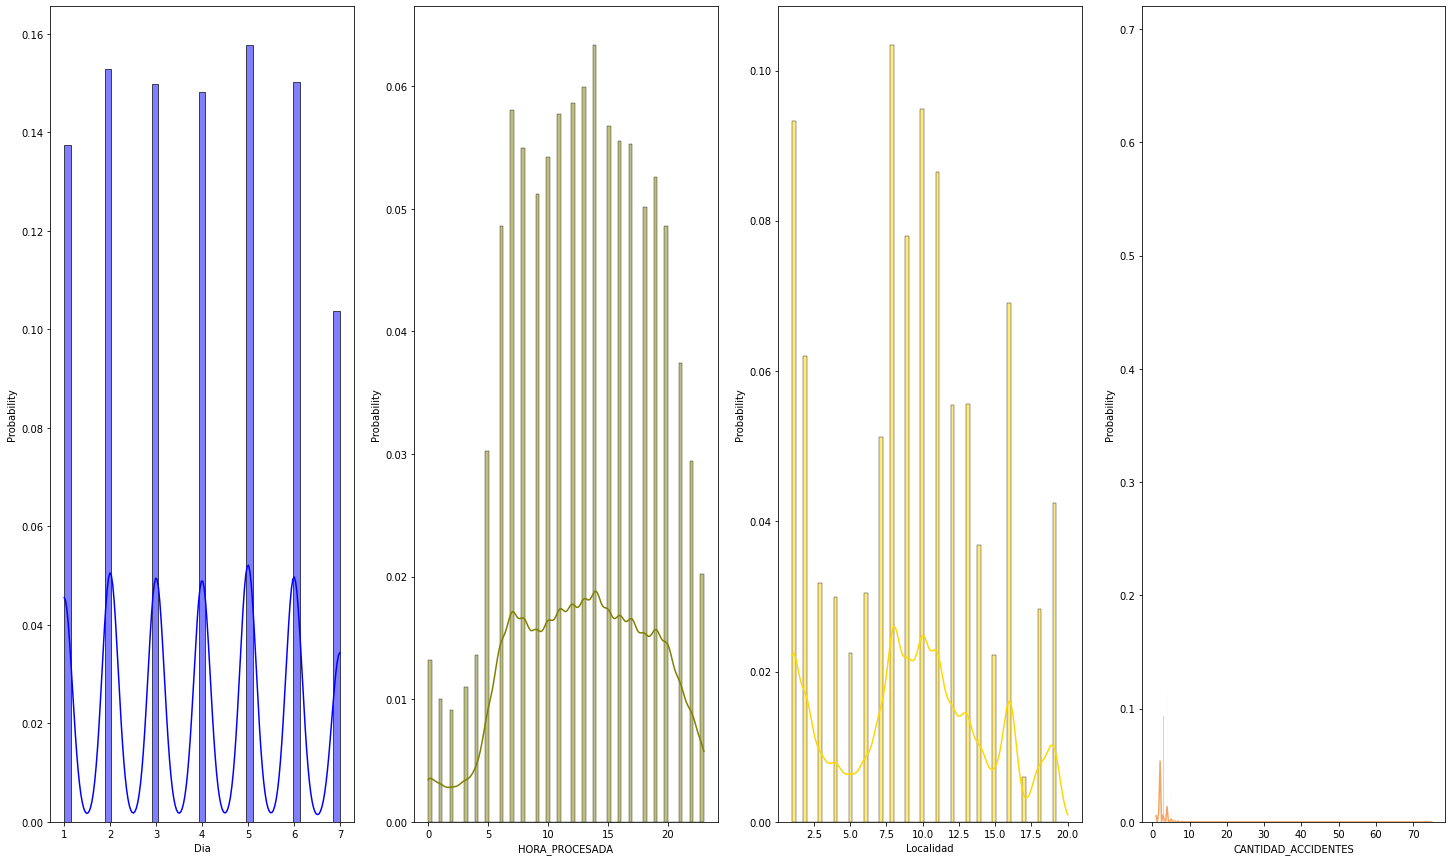

In [105]:
## Graficar distribuciones de los datos

fig, axs = plt.subplots(1, 4, figsize=(25,15)) 
sns.histplot(data=data, x="Dia", kde = True, color="b", stat='probability', ax=axs[0])
sns.histplot(data=data, x="HORA_PROCESADA", kde = True, color="olive", stat='probability', ax=axs[1])
sns.histplot(data=data, x="Localidad", kde=True, color="gold", stat='probability', ax=axs[2])
sns.histplot(data=data, x="CANTIDAD_ACCIDENTES", kde = True, color="sandybrown", stat='probability', ax=axs[3])
plt.show()

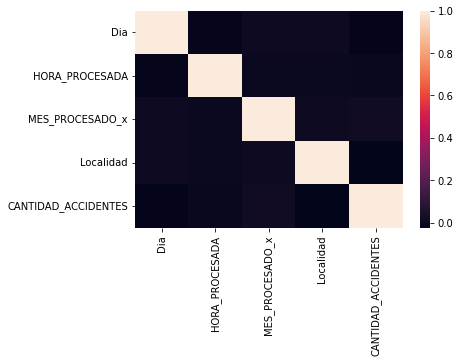

In [106]:
## Revisión de correlaciones

corr = data.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

A simple vista, no parece existir correlaciones entre los datos

In [107]:
## Binarizar datos categóricos

df = pd.get_dummies(data, columns=["Dia"], prefix=["Dia_is"] )
df = pd.get_dummies(df, columns=["MES_PROCESADO_x"], prefix=["Mes_is"] )
df = pd.get_dummies(df, columns=["HORA_PROCESADA"], prefix=["Hora_is"] )
df

,Localidad,CANTIDAD_ACCIDENTES,Dia_is_1,Dia_is_2,Dia_is_3,Dia_is_4,Dia_is_5,Dia_is_6,Dia_is_7,Mes_is_1,Mes_is_2,Mes_is_3,Mes_is_4,Mes_is_5,Mes_is_6,Mes_is_7,Mes_is_8,Mes_is_9,Mes_is_10,Mes_is_11,Mes_is_12,Hora_is_0,Hora_is_1,Hora_is_2,Hora_is_3,Hora_is_4,Hora_is_5,Hora_is_6,Hora_is_7,Hora_is_8,Hora_is_9,Hora_is_10,Hora_is_11,Hora_is_12,Hora_is_13,Hora_is_14,Hora_is_15,Hora_is_16,Hora_is_17,Hora_is_18,Hora_is_19,Hora_is_20,Hora_is_21,Hora_is_22,Hora_is_23
0,19,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,12,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,9,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,14,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,18,2,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152484,6,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
152485,6,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
152486,7,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
152487,10,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [108]:
## Definición variable objetivo

Y = df['CANTIDAD_ACCIDENTES']
X = df.drop(['CANTIDAD_ACCIDENTES'], axis=1)

In [109]:
## Division de entrenamiento

X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.3, random_state=0)

In [110]:
## Modelo para regresión lineal

modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [112]:
## Evaluar métricas de predicción

y_pred = modelo_regresion.predict(X_test)
print("MSE: %.2f" % mean_squared_error(Y_test, y_pred, squared=False))
print("MAE: %.2f" % mean_absolute_error(Y_test, y_pred))
print('R²: %.2f' % r2_score(Y_test, y_pred))

MSE: 1.27
MAE: 0.86
R²: 0.01


Se observa que el modelo de regresión lineal no se ajusta a los datos

In [113]:
## Revisión de coeficientes

modelo_regresion.coef_

array([-5.80945532e-03,  7.51340839e+09,  7.51340839e+09,  7.51340839e+09,
        7.51340839e+09,  7.51340839e+09,  7.51340839e+09,  7.51340839e+09,
        2.81159770e+10,  2.81159770e+10,  2.81159770e+10,  2.81159770e+10,
        2.81159770e+10,  2.81159770e+10,  2.81159770e+10,  2.81159770e+10,
        2.81159770e+10,  2.81159770e+10,  2.81159770e+10,  2.81159770e+10,
       -3.65529136e+10, -3.65529136e+10, -3.65529136e+10, -3.65529136e+10,
       -3.65529136e+10, -3.65529136e+10, -3.65529136e+10, -3.65529136e+10,
       -3.65529136e+10, -3.65529136e+10, -3.65529136e+10, -3.65529136e+10,
       -3.65529136e+10, -3.65529136e+10, -3.65529136e+10, -3.65529136e+10,
       -3.65529136e+10, -3.65529136e+10, -3.65529136e+10, -3.65529136e+10,
       -3.65529136e+10, -3.65529136e+10, -3.65529136e+10, -3.65529136e+10])

In [114]:
## Ver las estadísticas del modelo

model = sm.OLS(Y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     CANTIDAD_ACCIDENTES   R-squared:                       0.010
Model:                             OLS   Adj. R-squared:                  0.010
Method:                  Least Squares   F-statistic:                     38.66
Date:                 Mon, 15 Nov 2021   Prob (F-statistic):          1.87e-304
Time:                         19:20:28   Log-Likelihood:            -2.5847e+05
No. Observations:               152489   AIC:                         5.170e+05
Df Residuals:                   152447   BIC:                         5.175e+05
Df Model:                           41                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Localidad     -0.0064      0.001     -9.530      0.000      -0.008      -0.005
Dia_is_1       1.3427      0.009    143.113      0.000       1.324       1.361
Dia_is_2       1.3892      0.009    154.313      0.000       1.372       1.407
Dia_is_3       1.3516      0.009    149.563      0.000       1.334       1.369
Dia_is_4       1.3350      0.009    147.607      0.000       1.317       1.353
Dia_is_5       1.3984      0.009    158.778      0.000       1.381       1.416
Dia_is_6       1.3669      0.009    152.238      0.000       1.349       1.385
Dia_is_7       1.2486      0.010    119.211      0.000       1.228       1.269
Mes_is_1       0.6552      0.011     59.759      0.000       0.634       0.677
Mes_is_2       0.7410      0.011     69.865      0.000       0.720       0.762
Mes_is_3       0.7947      0.011     70.742      0.000       0.773       0.817
Mes_is_4       0.8010      0.012     68.089      0.000       0.778       0.824
Mes_is_5       0.8108      0.011     71.536      0.000       0.789       0.833
Mes_is_6       0.8034      0.012     67.941      0.000       0.780       0.827
Mes_is_7       0.7747      0.012     66.585      0.000       0.752       0.797
Mes_is_8       0.8039      0.012     69.703      0.000       0.781       0.827
Mes_is_9       0.7996      0.012     69.218      0.000       0.777       0.822
Mes_is_10      0.8091      0.011     70.806      0.000       0.787       0.832
Mes_is_11      0.8150      0.012     70.506      0.000       0.792       0.838
Mes_is_12      0.8243      0.012     68.231      0.000       0.801       0.848
Hora_is_0      0.1175      0.029      4.109      0.000       0.061       0.173
Hora_is_1      0.1276      0.033      3.903      0.000       0.064       0.192
Hora_is_2      0.1036      0.034      3.016      0.003       0.036       0.171
Hora_is_3      0.1813      0.031      5.785      0.000       0.120       0.243
Hora_is_4      0.1514      0.028      5.389      0.000       0.096       0.207
Hora_is_5      0.3662      0.019     19.176      0.000       0.329       0.404
Hora_is_6      0.5454      0.015     35.798      0.000       0.516       0.575
Hora_is_7      0.5883      0.014     41.967      0.000       0.561       0.616
Hora_is_8      0.5609      0.014     39.050      0.000       0.533       0.589
Hora_is_9      0.4418      0.015     29.769      0.000       0.413       0.471
Hora_is_10     0.4838      0.014     33.517      0.000       0.455       0.512
Hora_is_11     0.4962      0.014     35.375      0.000       0.469       0.524
Hora_is_12     0.5343      0.014     38.392      0.000       0.507       0.562
Hora_is_13     0.5302      0.014     38.465      0.000       0.503       0.557
Hora_is_14     0.5779      0.013     43.021      0.000       0.552       0.604
Hora_is_15     0.4885      0.014     34.563      0.000       0.461    

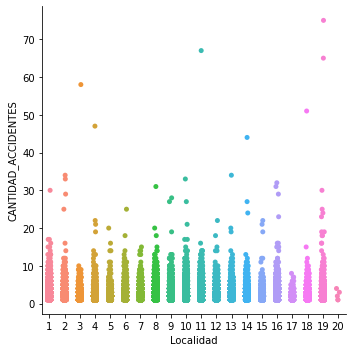

In [115]:
## Verificación de cantidad_accidentes vs Localidad

sns.catplot(y="CANTIDAD_ACCIDENTES", x="Localidad", data=data);

In [116]:
## Modelo polinomial para evaluar si se ajusta mejor a los datos

poly = PolynomialFeatures(2) 
poly_X = poly.fit_transform(X)

poly_X_train, poly_X_test, poly_Y_train, poly_Y_test = train_test_split(poly_X, Y, test_size = 0.2, random_state = 0) 
modelo_regresion_poly = LinearRegression()
modelo_regresion_poly.fit(poly_X_train, poly_Y_train)

y_pred_poli = modelo_regresion_poly.predict(poly_X_test) 
print('------ Métricas Modelo de regresión lineal polinomial múltiple----') 
print("MSE: %.2f" % mean_squared_error(poly_Y_test, y_pred_poli, squared=True)) 
print("RMSE: %.2f" % mean_squared_error(poly_Y_test, y_pred_poli, squared=False)) 
print("MAE: %.2f" % mean_absolute_error(poly_Y_test, y_pred_poli)) 
print('R²: %.2f' % r2_score(poly_Y_test, y_pred_poli))

------ Métricas Modelo de regresión lineal polinomial múltiple----
MSE: 1.58
RMSE: 1.26
MAE: 0.86
R²: 0.01


In [118]:
## Revisión del modelo Rigde para validar si mejora

param_grid = {'alpha': [0,0.001,0.1,0.2,0.3,0.01,0.02,0.05,0.5],'normalize':[False,True]}
particiones = KFold(n_splits=10, shuffle=True, random_state = 0)
modelo_ridge = Ridge()
mejor_modelo_r = GridSearchCV(modelo_ridge, param_grid, cv=particiones, scoring = 'r2', n_jobs=-1)
mejor_modelo_r.fit(X_train, Y_train)
print("Mejor parámetro: {}".format(mejor_modelo_r.best_params_))


y_pred_ridge = mejor_modelo_r.predict(X_test)
print("MSE: %.2f" % mean_squared_error(Y_test, y_pred_ridge, squared=False))
print("MAE: %.2f" % mean_absolute_error(Y_test, y_pred_ridge))
print('R²: %.2f' % r2_score(Y_test, y_pred_ridge))

Mejor parámetro: {'alpha': 0.05, 'normalize': True}
MSE: 1.27
MAE: 0.86
R²: 0.01


Se concluye que tal cual como está el modelo y los datos, no se genera un modelo de regresión lineal que se adecúe a los datos.

In [119]:
## Cargar dataset con datos demográficos

data_demo = pd.read_csv('completo_codificado.csv', encoding='latin-1', sep=',')
data_demo

,CANTIDAD_ACCIDENTES,Poblacion,Extension,Urbana,Rural,Indice,ACCIDENTALIDAD,Dia_is_1,Dia_is_2,Dia_is_3,Dia_is_4,Dia_is_5,Dia_is_6,Dia_is_7,Localidad_is_1,Localidad_is_2,Localidad_is_3,Localidad_is_4,Localidad_is_5,Localidad_is_6,Localidad_is_7,Localidad_is_8,Localidad_is_9,Localidad_is_10,Localidad_is_11,Localidad_is_12,Localidad_is_13,Localidad_is_14,Localidad_is_15,Localidad_is_16,Localidad_is_17,Localidad_is_18,Localidad_is_19,Localidad_is_20,Mes_is_1,Mes_is_2,Mes_is_3,Mes_is_4,Mes_is_5,Mes_is_6,Mes_is_7,Mes_is_8,Mes_is_9,Mes_is_10,Mes_is_11,Mes_is_12,Hora_is_0,Hora_is_1,Hora_is_2,Hora_is_3,Hora_is_4,Hora_is_5,Hora_is_6,Hora_is_7,Hora_is_8,Hora_is_9,Hora_is_10,Hora_is_11,Hora_is_12,Hora_is_13,Hora_is_14,Hora_is_15,Hora_is_16,Hora_is_17,Hora_is_18,Hora_is_19,Hora_is_20,Hora_is_21,Hora_is_22,Hora_is_23
0,2,571268,65.54,1,0,0.035010,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,571268,65.54,1,0,0.035010,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,2,571268,65.54,1,0,0.035010,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
3,4,571268,65.54,1,0,0.070020,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,571268,65.54,1,0,0.017505,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152484,4,3584,780.96,0,1,11.160714,2,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
152485,1,3584,780.96,0,1,2.790179,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
152486,1,3584,780.96,0,1,2.790179,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
152487,2,3584,780.96,0,1,5.580357,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


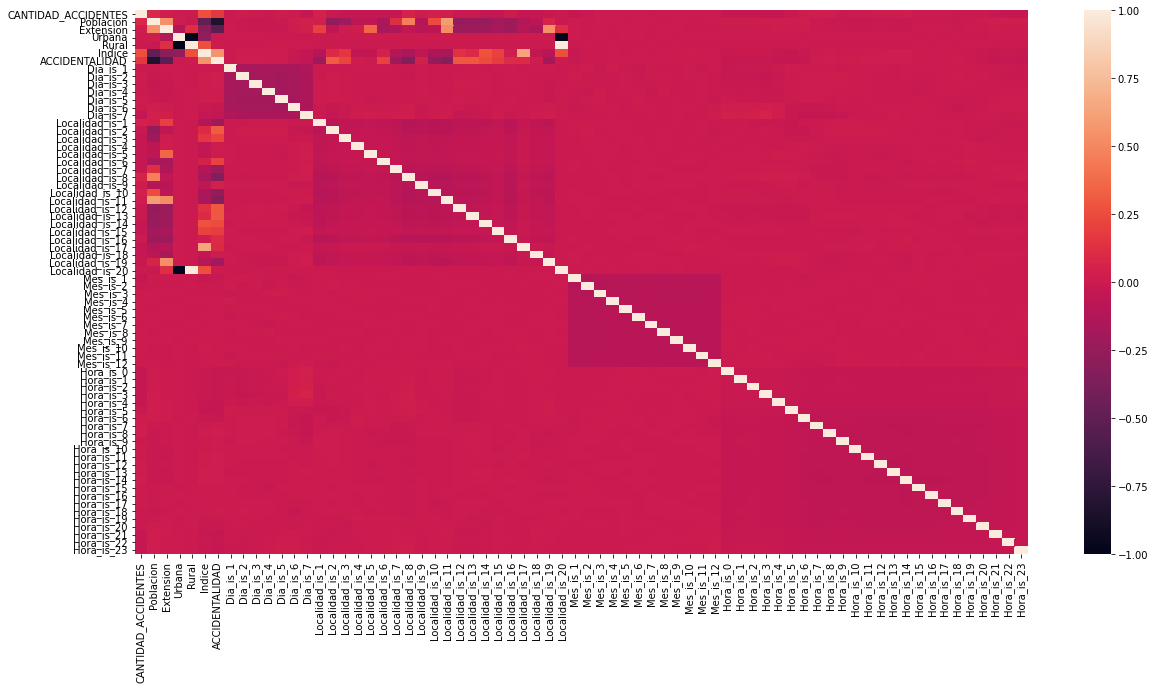

In [123]:
## Validación de correlaciones

corr = data_demo.corr()
plt.figure(figsize = (20,10))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values)
plt.show()

In [126]:
## Selección de variable objetivo y separación de dataset para entrenamiento y validación

Y = data_demo['Indice']
X = data_demo.drop(['Indice'], axis=1)
X = X.drop(['CANTIDAD_ACCIDENTES'], axis=1)
X = X.drop(['ACCIDENTALIDAD'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

modelo_regresion = LinearRegression()
modelo_regresion.fit(X_train, Y_train)

y_pred = modelo_regresion.predict(X_test)
print("MSE: %.2f" % mean_squared_error(Y_test, y_pred, squared=False))
print("MAE: %.2f" % mean_absolute_error(Y_test, y_pred))
print('R²: %.2f' % r2_score(Y_test, y_pred))

MSE: 0.08
MAE: 0.03
R²: 0.61


Se obtiene un modelo mejor que los anteriores con la data enriquecida demográficamente y cambiando la variable objetivo por el índice calculado

In [129]:
## Guardar modelo
joblib.dump(modelo_regresion, 'regresion_model.pkl') # Serialización
modelo_regresion = joblib.dump(modelo_regresion, 'regresion_model.pkl') # Deserialización

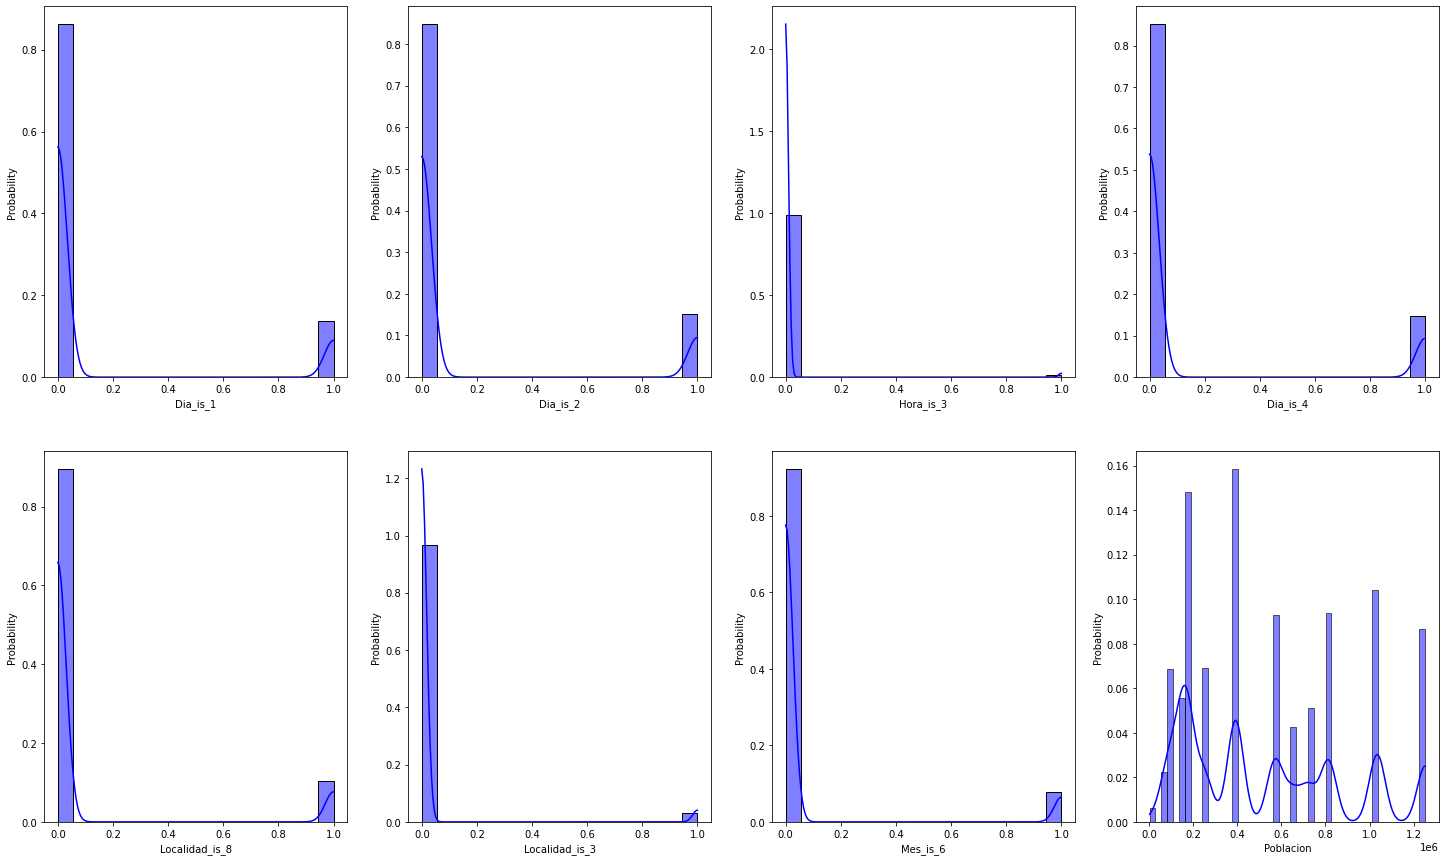

In [127]:
## Revisión de las distribuciones de los datasets de entrenamiento y validación
## Graficar datasets de entrenamiento, variables al azar

fig, axs = plt.subplots(2, 4, figsize=(25, 15)) 
sns.histplot(data=X_train['Dia_is_1'], kde = True, color="b", stat='probability', ax=axs[0,0])
sns.histplot(data=X_train['Dia_is_2'], kde = True, color="b", stat='probability', ax=axs[0,1])
sns.histplot(data=X_train['Hora_is_3'], kde = True, color="b", stat='probability', ax=axs[0,2])
sns.histplot(data=X_train['Dia_is_4'], kde = True, color="b", stat='probability', ax=axs[0,3])
sns.histplot(data=X_train['Localidad_is_8'], kde = True, color="b", stat='probability', ax=axs[1,0])
sns.histplot(data=X_train['Localidad_is_3'], kde = True, color="b", stat='probability', ax=axs[1,1])
sns.histplot(data=X_train['Mes_is_6'], kde = True, color="b", stat='probability', ax=axs[1,2])
sns.histplot(data=X_train['Poblacion'], kde = True, color="b", stat='probability', ax=axs[1,3])

plt.show()

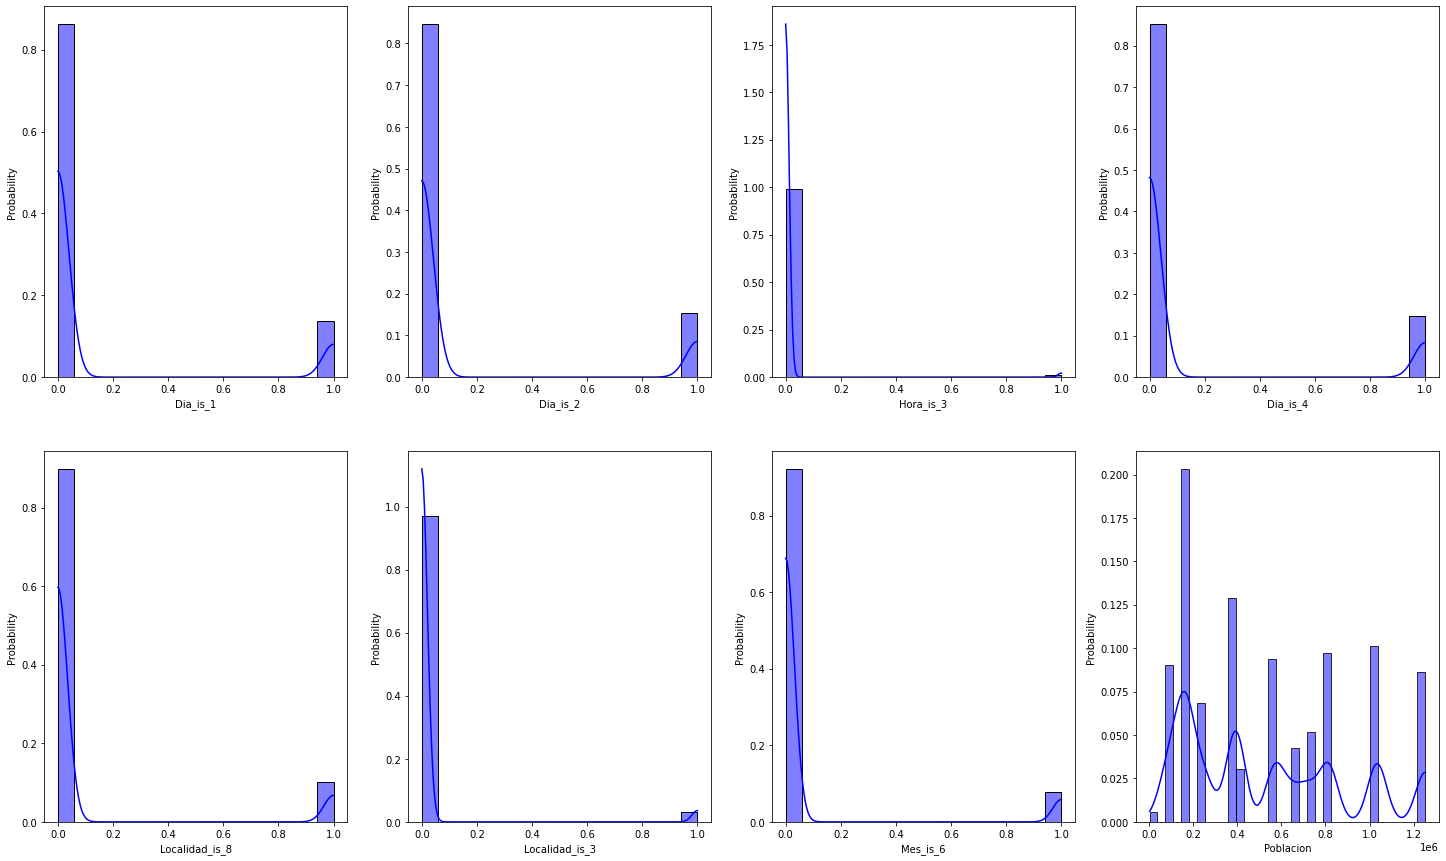

In [128]:
## Graficar dataset de validación

fig, axs = plt.subplots(2, 4, figsize=(25,15)) 
sns.histplot(data=X_test['Dia_is_1'], kde = True, color="b", stat='probability', ax=axs[0,0])
sns.histplot(data=X_test['Dia_is_2'], kde = True, color="b", stat='probability', ax=axs[0,1])
sns.histplot(data=X_test['Hora_is_3'], kde = True, color="b", stat='probability', ax=axs[0,2])
sns.histplot(data=X_test['Dia_is_4'], kde = True, color="b", stat='probability', ax=axs[0,3])
sns.histplot(data=X_test['Localidad_is_8'], kde = True, color="b", stat='probability', ax=axs[1,0])
sns.histplot(data=X_test['Localidad_is_3'], kde = True, color="b", stat='probability', ax=axs[1,1])
sns.histplot(data=X_test['Mes_is_6'], kde = True, color="b", stat='probability', ax=axs[1,2])
sns.histplot(data=X_test['Poblacion'], kde = True, color="b", stat='probability', ax=axs[1,3])

plt.show()